Imaginem que vocês querem avaliar a mobilidade no entorno da UFRN, em Natal/RN
- Quais bairros analisar?
- Onde eu poderia colocar dock-station(s) de compartilhamento de bibliotecas?
- Desconsidere paradas de ônibus.

## Requisito 1
Usar na solução as métricas de centralidade vistas em sala, e imagens da rede destacadas pelas métricas.
- Centralidade de Grau: Número de conexões
- Centralidade de proximidade : Distância média para todos os outros vértices
- Centralidade de intermediação : Posição no caminho mais curto (intermediação)
- Centralidade de autovetor: Pontuação de autoridade com base na pontuação dos vizinhos

In [39]:
# %pip install osmnx networkx
# %pip install scipy

In [42]:
import osmnx as ox
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy

### Teste 1 (somente UFRN)

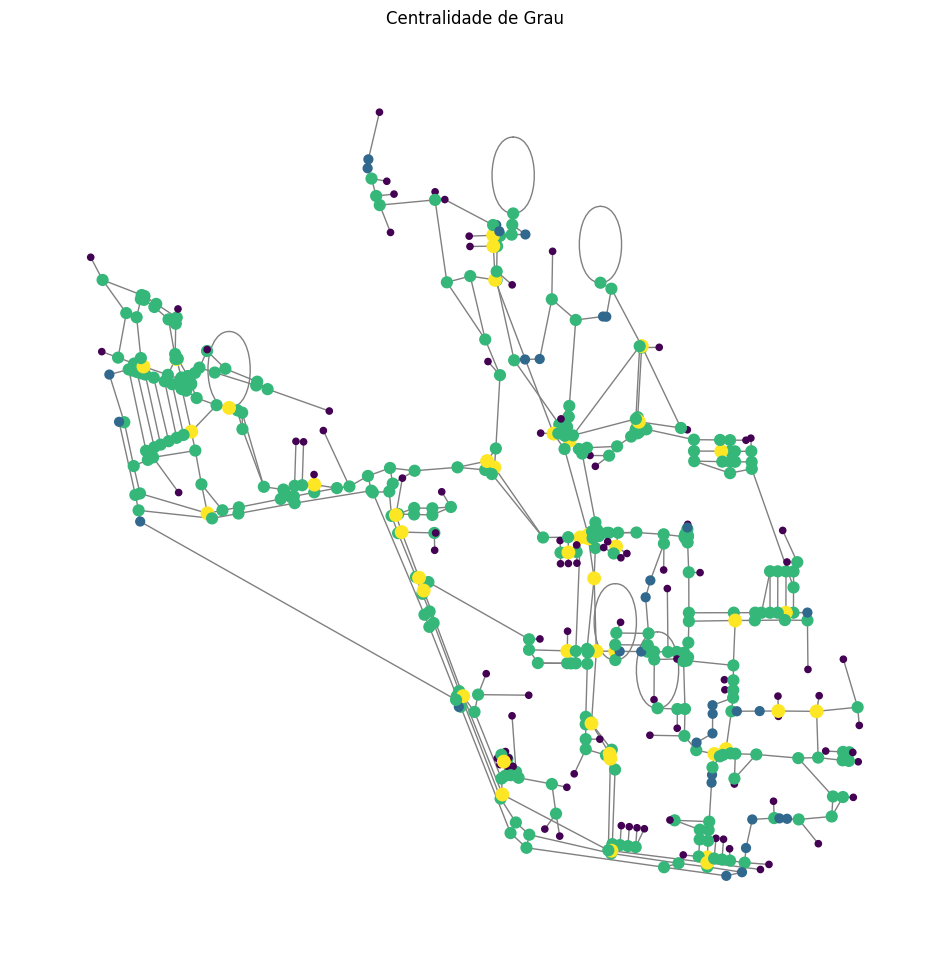

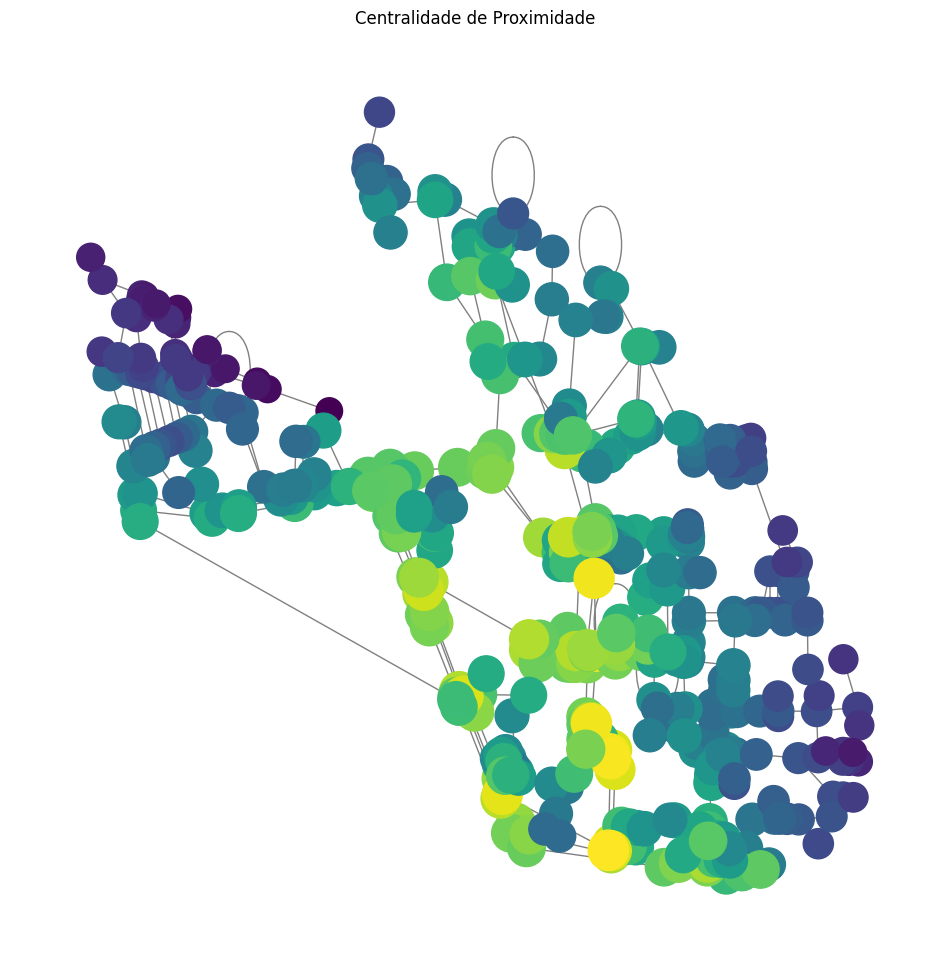

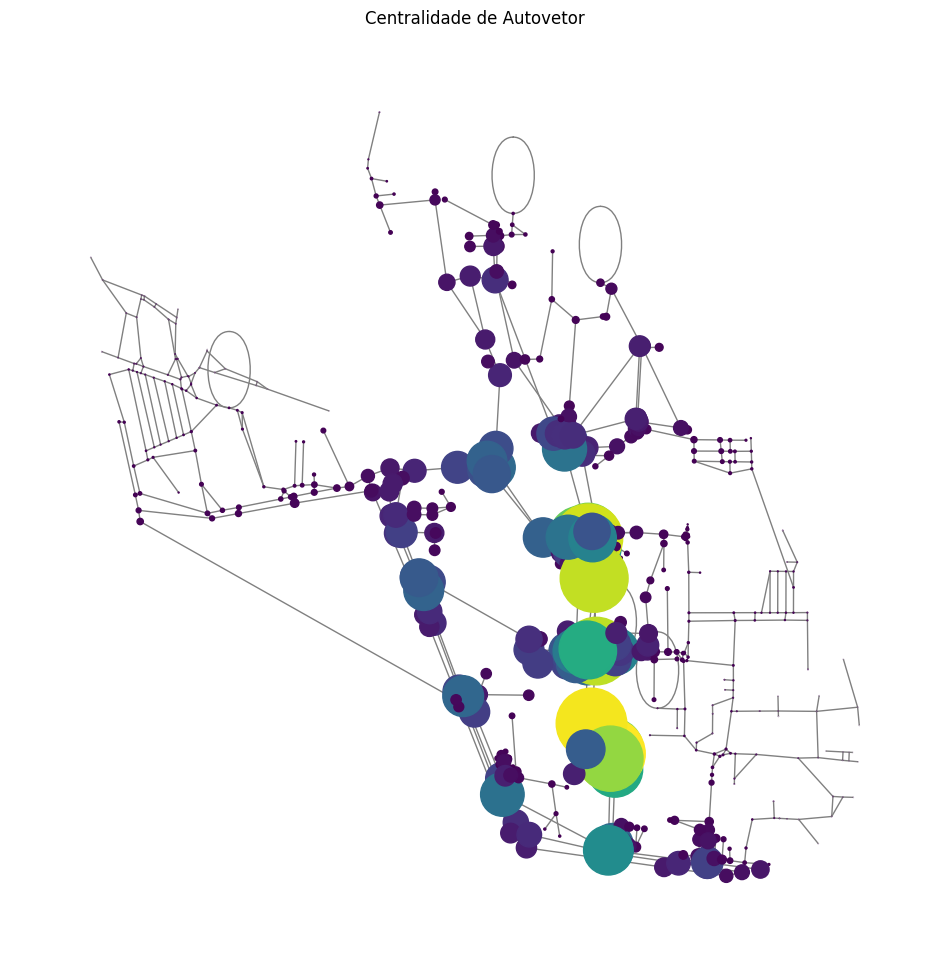

In [ ]:
# 1. Baixar o grafo da rede de ruas no entorno da UFRN
place_name = "Universidade Federal do Rio Grande do Norte, Natal, Brazil"
G = ox.graph_from_place(place_name, network_type='bike')

# Converter o grafo para um grafo simples (sem arestas múltiplas)
G_simple = nx.Graph(G)

# 2. Calcular as métricas de centralidade com ajuste em `eigenvector_centrality`
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple, normalized=True)

# Centralidade de autovetor com mais iterações e vetor inicial
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Centralidade de autovetor não convergiu.")

# 3. Adicionar as métricas como atributos de cada nó (se convergiu)
nx.set_node_attributes(G_simple, degree_centrality, 'degree')
nx.set_node_attributes(G_simple, closeness_centrality, 'closeness')
nx.set_node_attributes(G_simple, betweenness_centrality, 'betweenness')

if 'eigenvector_centrality' in locals():
    nx.set_node_attributes(G_simple, eigenvector_centrality, 'eigenvector')

# 4. Função para plotar a rede com destaque para uma métrica
def plot_graph_with_centrality(G, centrality, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    node_colors = [centrality[node] for node in G.nodes if node in centrality]
    node_size = [v * 10000 for v in node_colors]  # Escala para visualização

    pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

    nx.draw(
        G,
        pos,
        ax=ax,
        node_color=node_colors,
        node_size=node_size,
        with_labels=False,
        edge_color="gray",
        cmap=plt.cm.viridis,
        vmin=min(node_colors),
        vmax=max(node_colors),
    )
    ax.set_title(title)
    plt.show()

# 5. Plotar a rede com as diferentes métricas de centralidade
plot_graph_with_centrality(G_simple, degree_centrality, 'Centralidade de Grau')
plot_graph_with_centrality(G_simple, closeness_centrality, 'Centralidade de Proximidade')
plot_graph_with_centrality(G_simple, betweenness_centrality, 'Centralidade de Intermediação')

if 'eigenvector_centrality' in locals():
    plot_graph_with_centrality(G_simple, eigenvector_centrality, 'Centralidade de Autovetor')


### Teste2 (UFRN + Capim Macio + Lagoa Nova)

C:\Users\polia\AppData\Local\Temp\ipykernel_18108\658355346.py:8: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(north, south, east, west, network_type='bike')


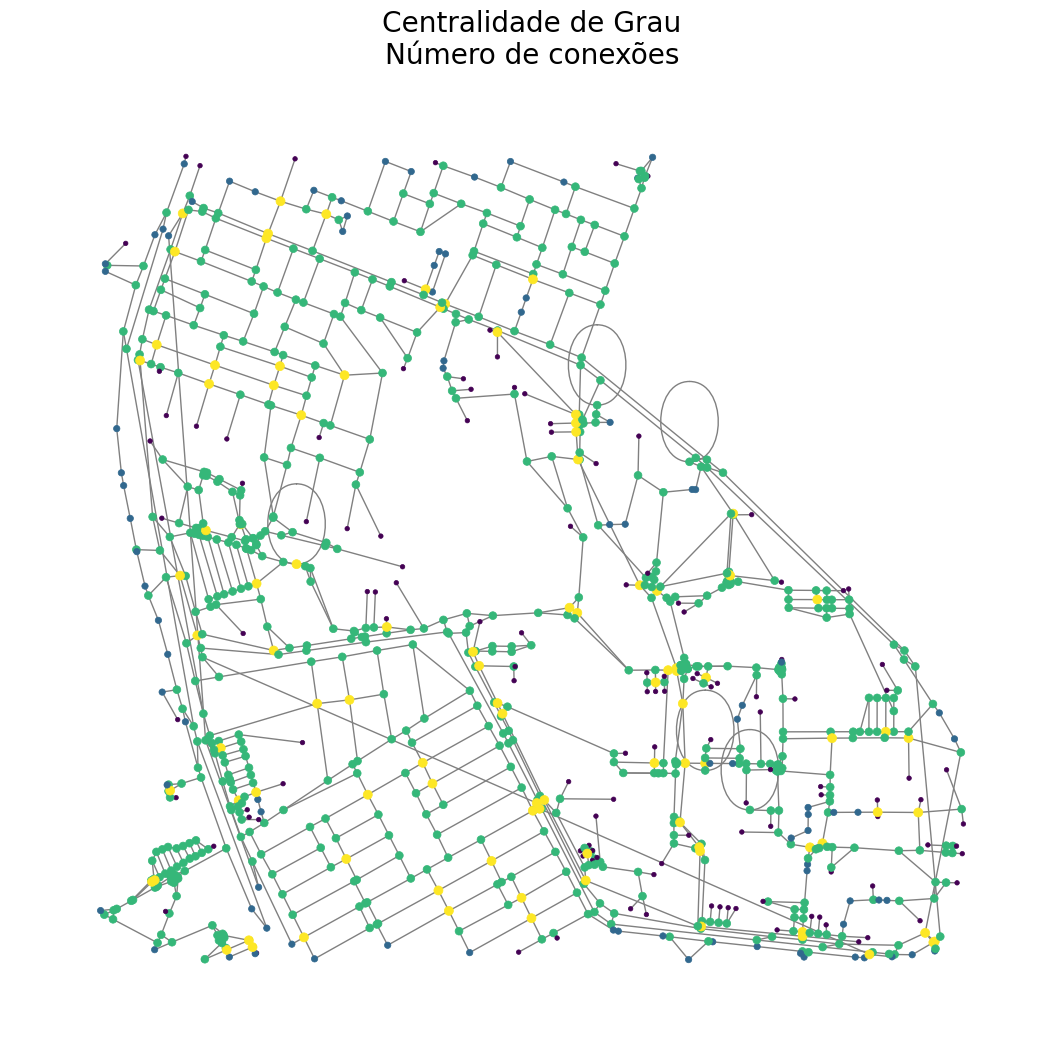

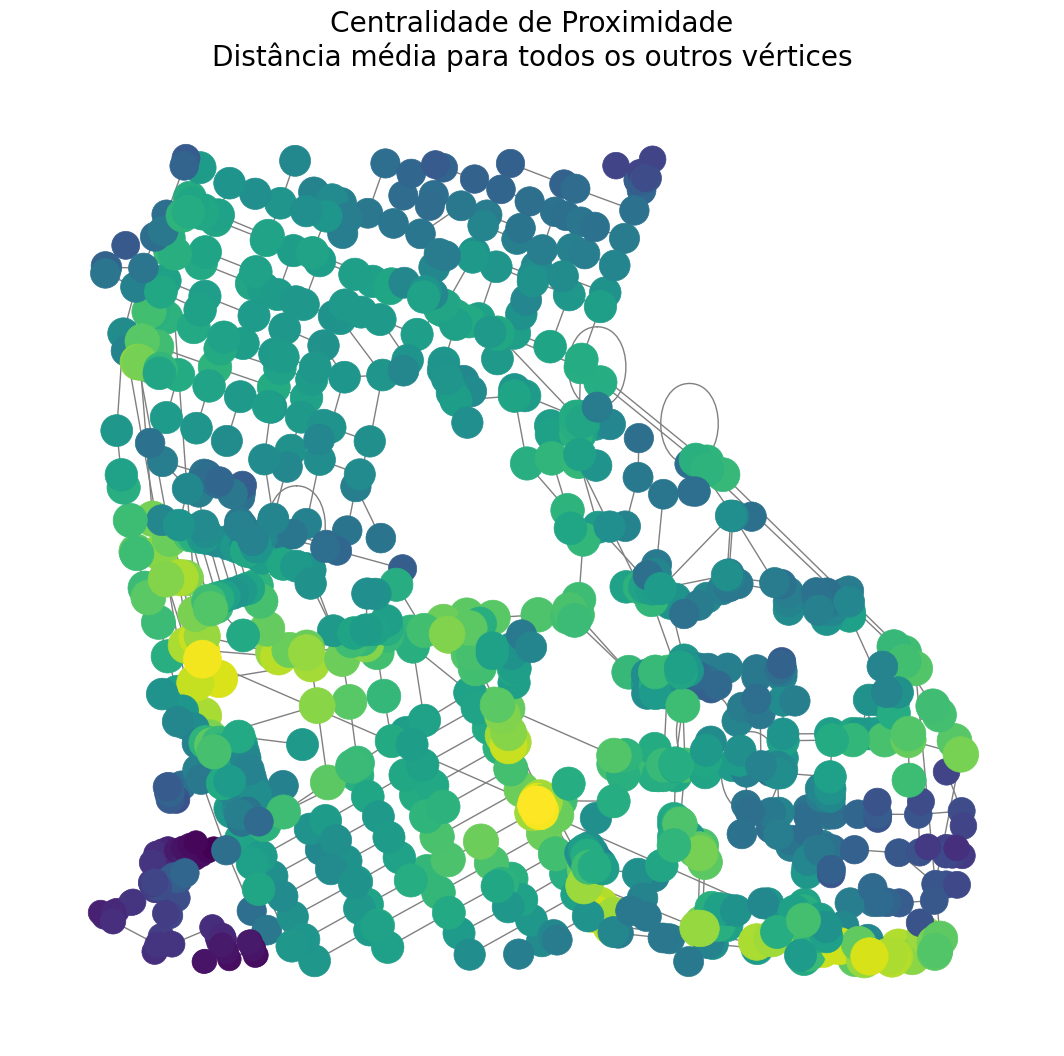

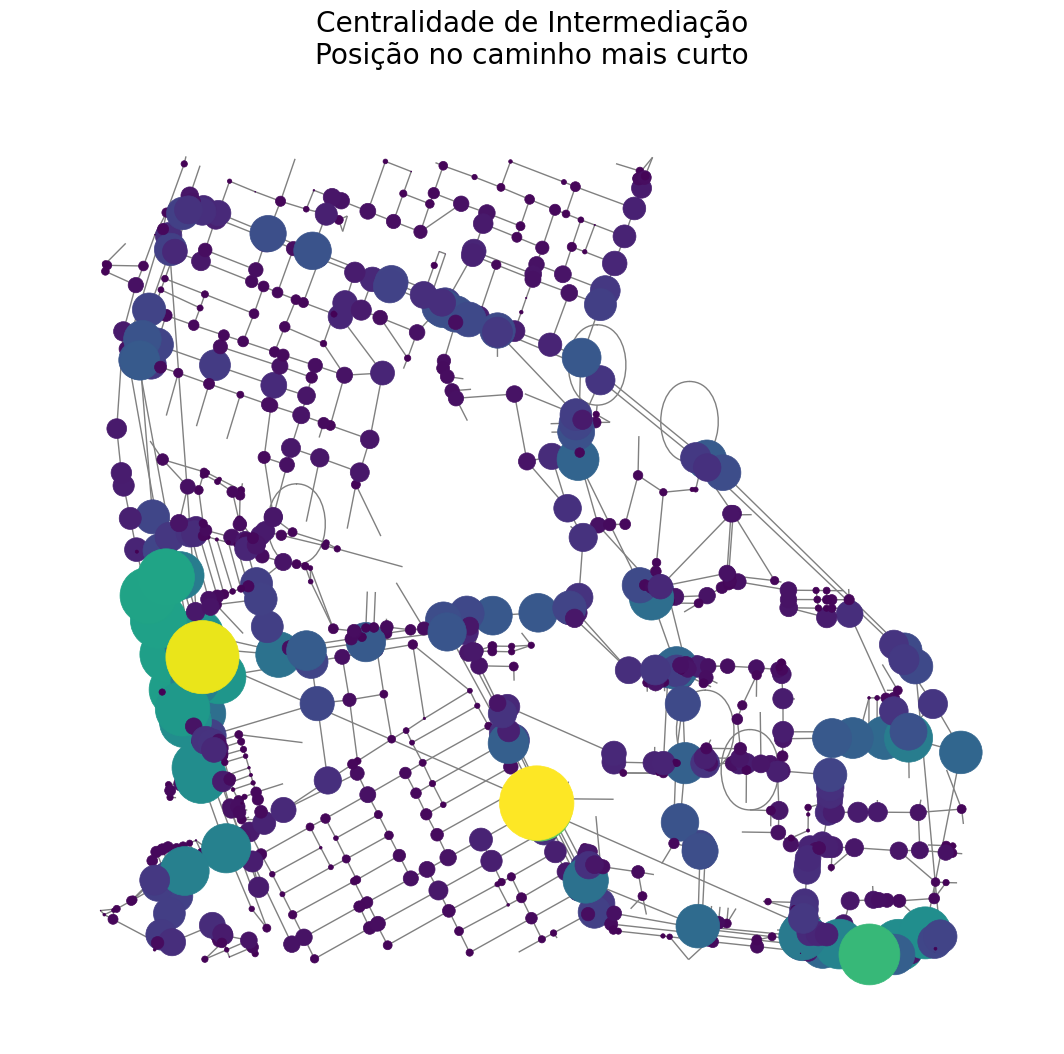

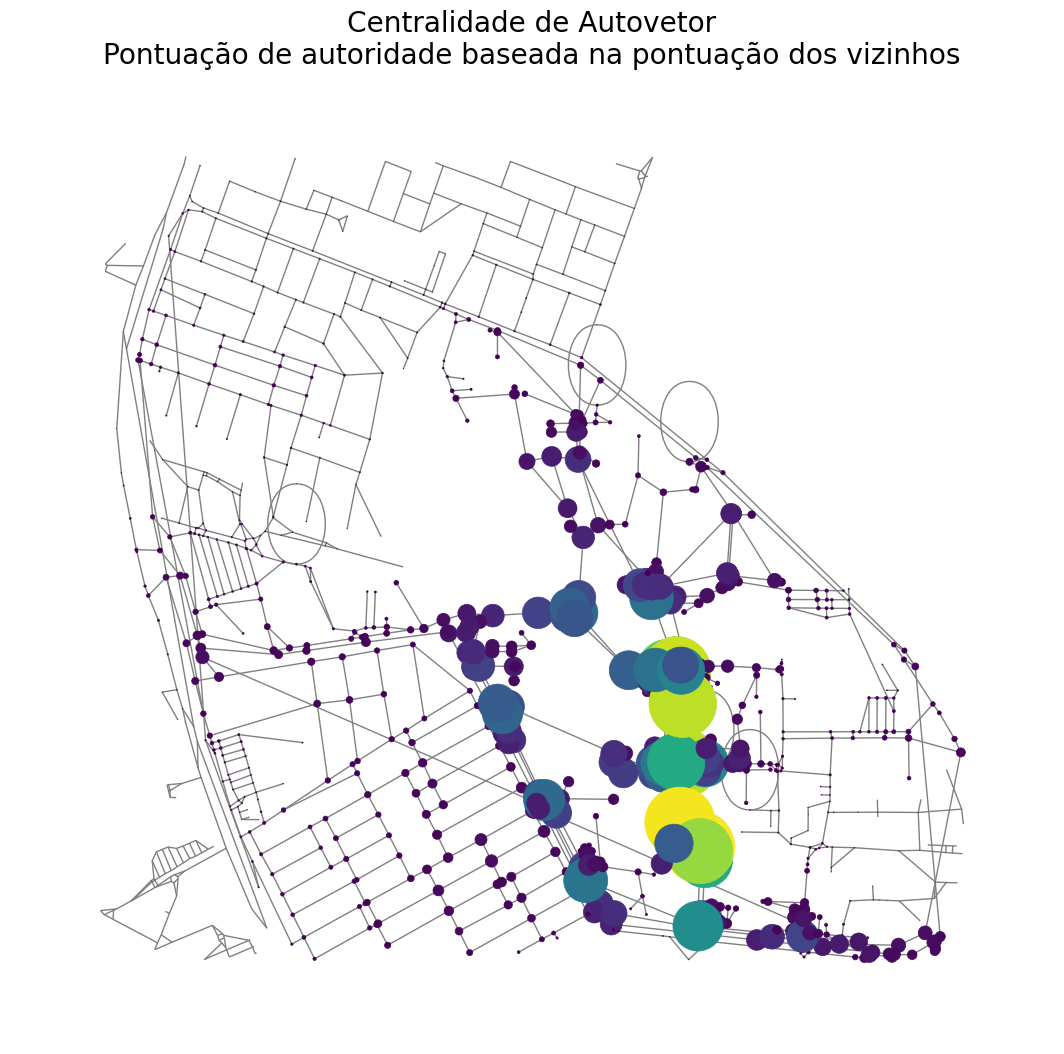

In [43]:
# 1. Definir a caixa delimitadora que inclui UFRN, Lagoa Nova e Capim Macio
north = -5.828601  # Latitude máxima
south = -5.844205  # Latitude mínima
east = -35.193962  # Longitude máxima
west = -35.213011  # Longitude mínima

# Obter o grafo da área delimitada
G = ox.graph_from_bbox(north, south, east, west, network_type='bike')

# Converter o grafo para um grafo simples (sem arestas múltiplas)
G_simple = nx.Graph(G)

# 2. Calcular as métricas de centralidade
degree_centrality = nx.degree_centrality(G_simple)
closeness_centrality = nx.closeness_centrality(G_simple)
betweenness_centrality = nx.betweenness_centrality(G_simple, normalized=True)

# Centralidade de autovetor com mais iterações e vetor inicial
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Centralidade de autovetor não convergiu.")

# 3. Adicionar as métricas como atributos de cada nó
nx.set_node_attributes(G_simple, degree_centrality, 'degree')
nx.set_node_attributes(G_simple, closeness_centrality, 'closeness')
nx.set_node_attributes(G_simple, betweenness_centrality, 'betweenness')

if 'eigenvector_centrality' in locals():
    nx.set_node_attributes(G_simple, eigenvector_centrality, 'eigenvector')

# 4. Função para plotar a rede com destaque para uma métrica
def plot_graph_with_centrality(G, centrality, title):
    fig, ax = plt.subplots(figsize=(12, 12))
    node_colors = [centrality[node] for node in G.nodes if node in centrality]
    node_size = [v * 10000 for v in node_colors]  # Escala para visualização

    pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

    nx.draw(
        G,
        pos,
        ax=ax,
        node_color=node_colors,
        node_size=node_size,
        with_labels=False,
        edge_color="gray",
        cmap=plt.cm.viridis,
        vmin=min(node_colors),
        vmax=max(node_colors),
    )
    ax.set_title(title)
    plt.show()

# 5. Plotar a rede com as diferentes métricas de centralidade
plot_graph_with_centrality(G_simple, degree_centrality, 'Centralidade de Grau\nNúmero de conexões')
plot_graph_with_centrality(G_simple, closeness_centrality, 'Centralidade de Proximidade\nDistância média para todos os outros vértices')
plot_graph_with_centrality(G_simple, betweenness_centrality, 'Centralidade de Intermediação\nPosição no caminho mais curto')

if 'eigenvector_centrality' in locals():
    plot_graph_with_centrality(G_simple, eigenvector_centrality, 'Centralidade de Autovetor\nPontuação de autoridade baseada na pontuação dos vizinhos')


## Requisito 2
Para UFRN + Outros bairros

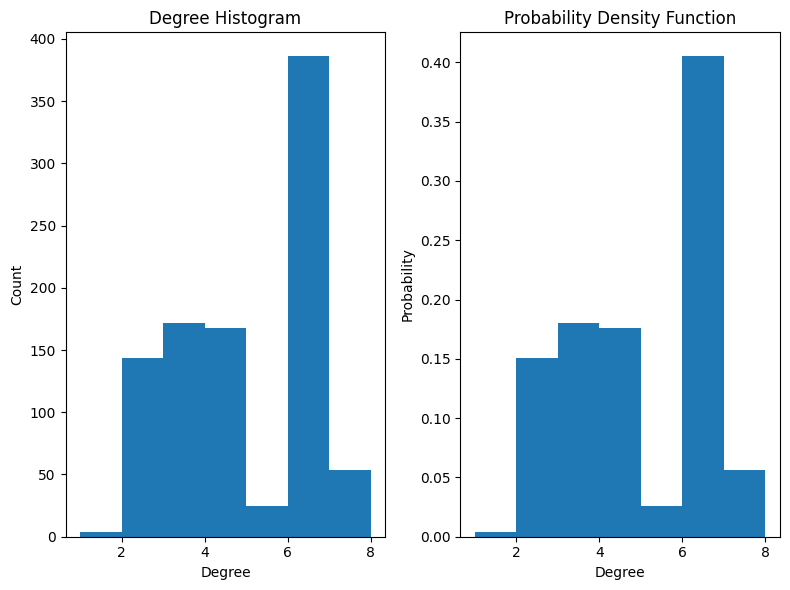

In [44]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,6))

# all_data has information about degree_sequence and the width of each bin
all_data = ax[0].hist(degree_sequence,bins=7)
ax[1].hist(degree_sequence,bins=7,density=True)

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")

ax[1].set_title("Probability Density Function")
ax[1].set_ylabel("Probability")
ax[1].set_xlabel("Degree")

plt.tight_layout()
plt.show()

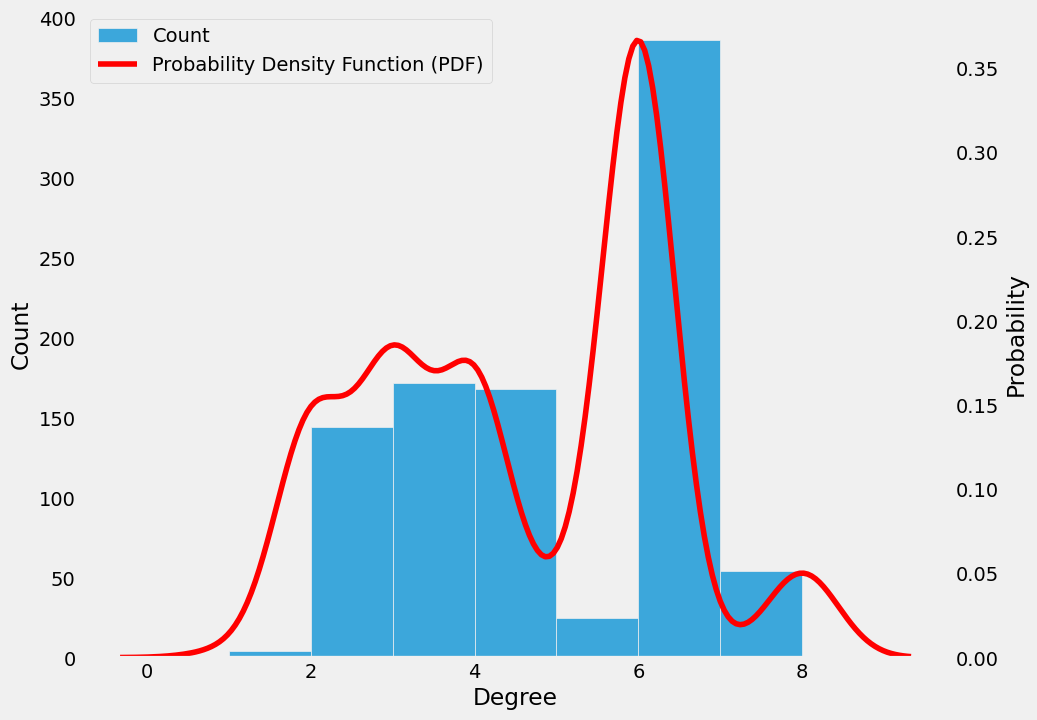

In [45]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

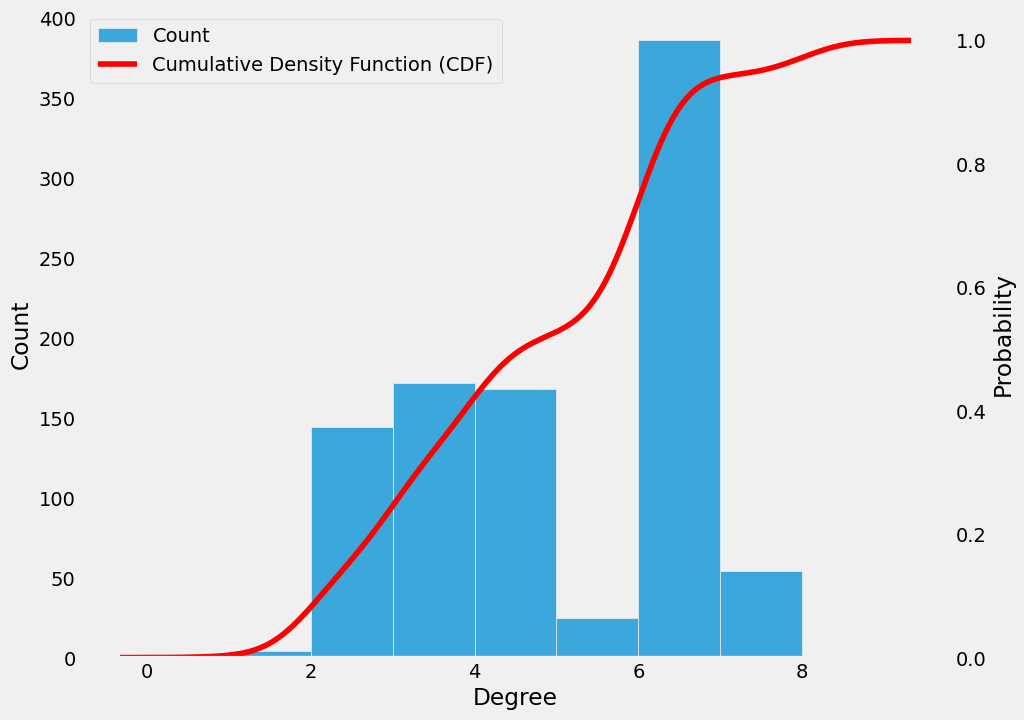

In [46]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## Requisito 3

Para realizar uma análise multivariada das métricas de centralidade que você calculou (centralidade de grau, proximidade, intermediação e autovetor), você pode usar a biblioteca `seaborn` para visualizar as relações entre essas métricas através de um gráfico de pares (PairGrid). Primeiro, você precisará compilar essas métricas em um DataFrame do `pandas` para que possam ser usadas com `seaborn`.

Aqui está um exemplo de como você pode fazer isso e, em seguida, gerar um gráfico de pares:

Crie um DataFrame com as métricas de centralidade.
Utilize `seaborn.PairGrid` para visualizar as relações entre as métricas.

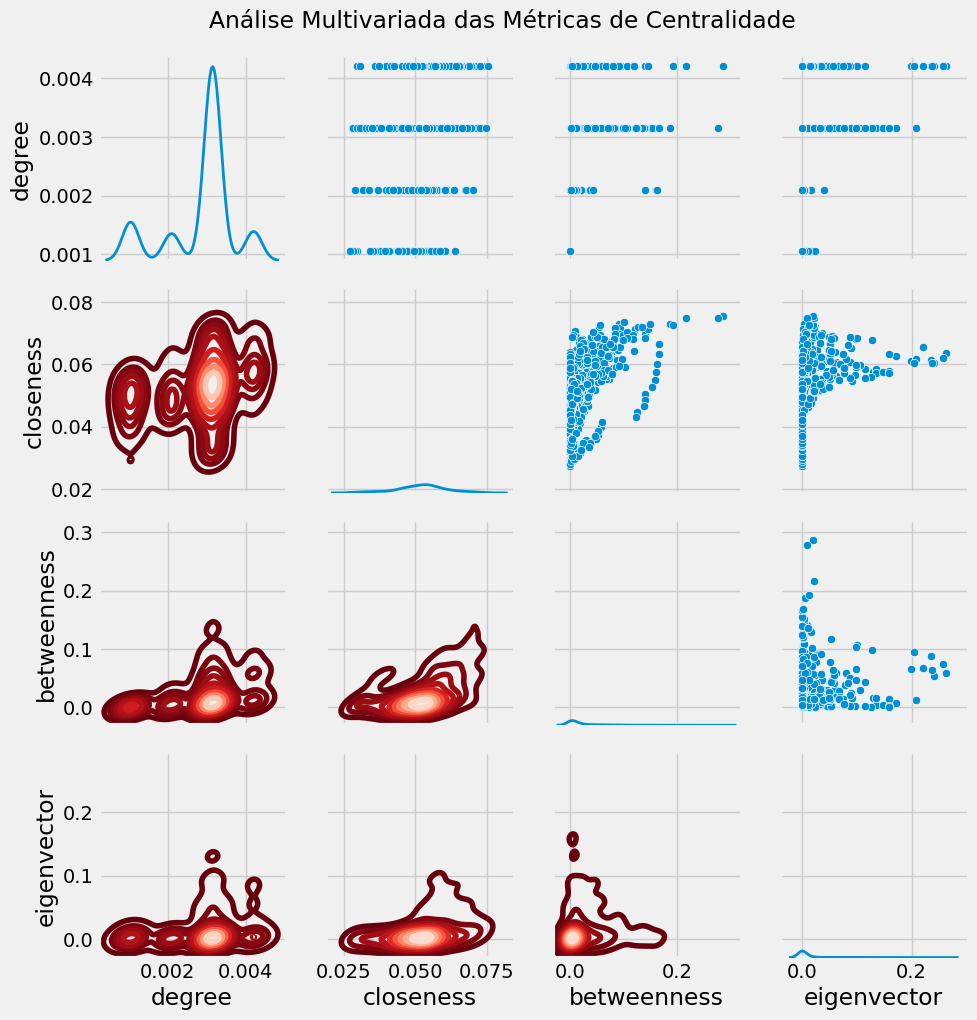

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Criar um DataFrame com as métricas de centralidade
centrality_data = {
    'degree': [degree_centrality[node] for node in G_simple.nodes()],
    'closeness': [closeness_centrality[node] for node in G_simple.nodes()],
    'betweenness': [betweenness_centrality[node] for node in G_simple.nodes()],
}

if 'eigenvector_centrality' in locals():
    centrality_data['eigenvector'] = [eigenvector_centrality[node] for node in G_simple.nodes()]

# Criar o DataFrame
df = pd.DataFrame(centrality_data)

# 2. Análise multivariada com PairGrid
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)  # Plota scatterplot na parte superior
fig.map_lower(sns.kdeplot, cmap="Reds_r")  # Plota KDE na parte inferior
fig.map_diag(sns.kdeplot, lw=2, legend=False)  # Plota KDE na diagonal

plt.suptitle("Análise Multivariada das Métricas de Centralidade", y=1.02)  # Título da figura
plt.show()

## Requisito 4
Quem é o core/shell da rede?

In [49]:
# Remover laços do grafo
G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

# shell = 1
# for i in nx.k_shell(G_simple,shell):
#     print(i)

# core = 0
# for i in nx.k_core(G_simple,core):
#     print(i)

print(set([v for k,v in nx.core_number(G_simple).items()]))

core = 2
for i in nx.k_core(G_simple,core):
    print(i)


{1, 2}
500968821
500968823
500968839
500968847
500968850
500968851
500968862
500968864
500968868
500968876
500968880
500973601
500973633
500973689
500973759
500975726
500986119
500986122
500986130
500986137
500986164
500986176
500986191
500986194
500986207
500986215
500986639
500986659
501006370
501006390
501006398
501006420
501006437
501006479
501006493
501006498
501006522
501006535
501006547
501006655
501006663
501006700
501006743
501006770
501006787
501006818
501006825
501006855
501013499
501013505
501013570
501013611
501033576
501033598
501033607
501033725
501033762
501033799
501033902
501034004
501034021
501034060
501034081
501034099
501087052
501087069
501087078
501087080
501087085
501087123
501087138
501087284
501087374
501087462
501118366
501118379
501118394
501118420
501118484
501118503
501118536
501118547
501152566
501152572
501152580
501152617
501271620
501271638
501271657
501271696
501271714
501271794
501286232
501286256
501286371
501620424
501791797
501791821
501825771
501

In [50]:
# the degree of network(g2)
fig, ax = plt.subplots(1, 1, figsize=(15,15))

# layout position
pos = nx.spring_layout(G_simple, seed=123456789, k=0.7)

# color of nodes
color = list(dict(nx.degree(G_simple)).values())

# draw edges
nx.draw_networkx_edges(G_simple,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G_simple,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet, ax=ax)

# draw labels
nx.draw_networkx_labels(G_simple, pos=pos,
                        font_color='white', ax=ax)

# Criando um ScalarMappable para a colorbar
sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(color), vmax=max(color)))
sm.set_array([])  # Necessário para evitar erros com o ScalarMappable

# Adicionando a barra de cores
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Degree Sociopatterns', rotation=270, labelpad=15)


plt.axis("off")
plt.savefig('sociopatterns.png', transparent=True,dpi=600)
plt.show()